---



# **GESTIÓN Y ALMACENAMIENTO DE DATOS**

## Avance proyecto final

##### Carlos Alberto Ruiz Delgado - 2241005



---



### Descripción del Proyecto:
##### En este proyecto, se llevará a cabo un proceso completo de limpieza, imputación y visualización de datos utilizando Python y herramientas como Pandas, NumPy y Matplotlib. Se abordarán los siguientes aspectos durante la sustentación:

### Contexto de los Datos:
##### Se proporcionará una breve introducción al conjunto de datos utilizado, explicando su origen y relevancia en el contexto del problema a resolver.

* **Introducción:**

El dataset empleado se llama "Forest Fires", proviene de un estudio entre investigadores asociados a la IEEE, el cual consta de información meteorológica y del tiempo, recolectada en incendios presentados bosques y selvas brasileñas y portugesas. Se recolectó dicha información con la intención de lograr obtener información valiosa, correlaciones entre las variables meteorológicas y el área potencial quemada por el incendio.

Los incendios se producen cuando la ignición (ya sea proveniente de un rayo, hoguera descuidada o el reflejo del sol en el vidrio, por ejemplo) se une al combustible disponible (vegetación seca), provocando las brasas o llamas que el aire se encarga de avivar y expandir.

* **Problemática:**

Debido al cambio climático y demás factores (medioambientales, auto-provocados, etc), hemos presenciado en nuestra región una creciente ola de incendios forestales; acabando con la vida de gran parte de nuestra fauna, flora y biodiversidad en general. No obstante, en la mayoría de las ocasiones se presenta más de un incendio al tiempo y al tener un personal de apoyo limitado, no se pueden cubrir de manera eficiente estos desastres.

En este sentido, se ha decidio seleccionar un dataset de incendios de forestales, con la intención de generar un modelo que sea capaz de estimar (de acuerdo con ciertas variables meteorológicas), el área potencial a quemarse o perderse debido a dichos fenómenos.

* **Valor generado:**

Una vez estimando el área potencial a ser quemada, se podría disponibilizar la información a los organismos de socorro, bomberos y/o atención de incendios, como una herramienta que les permita priorizar la atención de los fenómenos de la región, optimizando el número de personas que componen cada equipo de apoyo acorde al área potencial a ser quemada y así poder atender de mejor manera dichos fenómenos.

* **Referencias:**

[1] Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.

[2] Cortez, P. and Aníbal de Jesus Raimundo Morais. “A data mining approach to predict forest fires using meteorological data.” (2007).

[3] Tables for the Canadian Forest Fire Weather Index System, Canadian Forestry Service, Forest Technical Report, 1984.



### **Composición de la Base de Datos:**
##### Se detallará la estructura y composición de la base de datos, incluyendo la cantidad de registros, las variables disponibles y su significado.

El conjunto de datos consiste en 12 variables predictoras y un target (continuo).

1. **X** - coordenada espacial del eje x dentro del mapa del lugar: (1 a 9)
2. **Y** - coordenada espacial del eje y dentro del mapa del lugar: (2 a 9)
3. **mes** - mes del año:  ('ene' a 'dic')
4. **día** - día de la semana: ('jan' a 'sun')
5. **FFMC** - índice FFMC del sistema FWI, código de Humedad de Combustible Fino: (18,7 a 96,20)
6. **DMC** - índice DMC del sistema FWI, código de Humedad Duff: (1,1 a 291,3)
7. **DC** - Índice DC del sistema FWI: (7,9 a 860,6)
8. **ISI** - Índice ISI del sistema FWI, código de Sequía: (0,0 a 56,10)
9. **temp** - temperatura en grados Celsius: (2° a 33,3°)
10. **RH** - humedad relativa en %: (15 a 100%)
11. **wind** - velocidad del viento en km/h: (0,4 a 9,4)
12. **lluvia** - lluvia exterior en mm/m^2 : (0,0 a 6,4)
13. **superficie [Target]** - superficie quemada del bosque (en hectáreas): (0.00 a 1090.84)

Fire Weather Index (FWI) System

https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CarlosRuiz0/DATA/main/data_clean_forest_fires.csv', index_col='Unnamed: 0')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
print(f'El dataset posee {df.shape[0]} filas y {df.shape[1]} columnas, incluido el target.')

El dataset posee 513 filas y 13 columnas, incluido el target.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    int64  
 3   day     513 non-null    int64  
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 56.1 KB


### Creación de paleta de colores



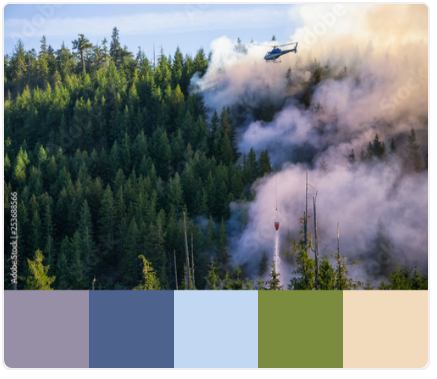

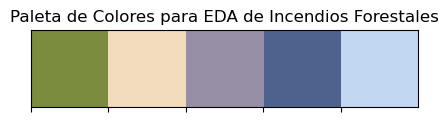

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores personalizada
forest_fire_palette = ["#7C8C3F", "#F2DABD","#968FA6", "#4D628C", "#C2D7F2"]

cmap = sns.color_palette(forest_fire_palette, as_cmap=True)
# Establecer la paleta de colores en seaborn
sns.set_palette(sns.color_palette(forest_fire_palette))
sns.palplot(sns.color_palette(forest_fire_palette))
plt.title("Paleta de Colores para EDA de Incendios Forestales")
plt.show()

### Proceso de creación de funciones para visualización:

In [7]:
def generar_boxplot(variable, ax=None):
    sns.boxplot(x=df[variable], ax=ax)
    ax.set_title(f"Distribución de {variable}")

In [193]:
def generar_scatter_plots(variable_1, variable_2, data = df, ax = None):
  #plt.figure(figsize=(8, 4))
  sns.scatterplot(data=data, x = df[variable_1], y = df[variable_2], ax = ax)
  ax.set_title(f"{variable_1} vs. {variable_2} del incendio")

In [9]:
def generar_suplots_boxplots(variables):
  n = len(variables)
  n_cols = 3
  n_rows = n // n_cols + (n % n_cols > 0)
  fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2))

  for i, variable in enumerate(variables):
      row = i // n_cols
      col = i % n_cols
      generar_boxplot(variable, ax=axs[row, col])

  plt.tight_layout()
  plt.show()

In [10]:
def generar_heatmap(data, titulo, metodo='pearson', ax=None):
  sns.heatmap(data.corr(method=metodo), annot=True, ax=ax, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1,  cmap=cmap)
  ax.set_title(f'{titulo} ({metodo})')

In [203]:
def generar_barplot(variable_1, variable_2, data=df):
  categorical_feature = [variable_1, variable_2]
  plt.figure(figsize=(10, 5))
  for idx, column in enumerate(categorical_feature):
      unique = data[column].value_counts(ascending=True)
      plt.subplot(1, 2, idx+1)
      plt.title("Frecuencia de variable: "+ column)
      plt.bar(unique.index, unique.values)
      plt.xlabel(column)
      plt.ylabel("Conteo de "+ column)
  plt.show()

In [208]:
def generar_lmplot(y, x, hue, titulo, df=df):
  plt.figure(figsize=(8, 4))
  sns.lmplot(data=df, y=y, x=x, hue=hue, height=5, palette=forest_fire_palette)
  plt.title(titulo)
  plt.show()

### Visualización de Datos:
##### Se presentarán al menos tres gráficos que representen aspectos relevantes de los datos analizados. Cada gráfico será acompañado de una explicación detallada que resalte los insights obtenidos a partir de la visualización.

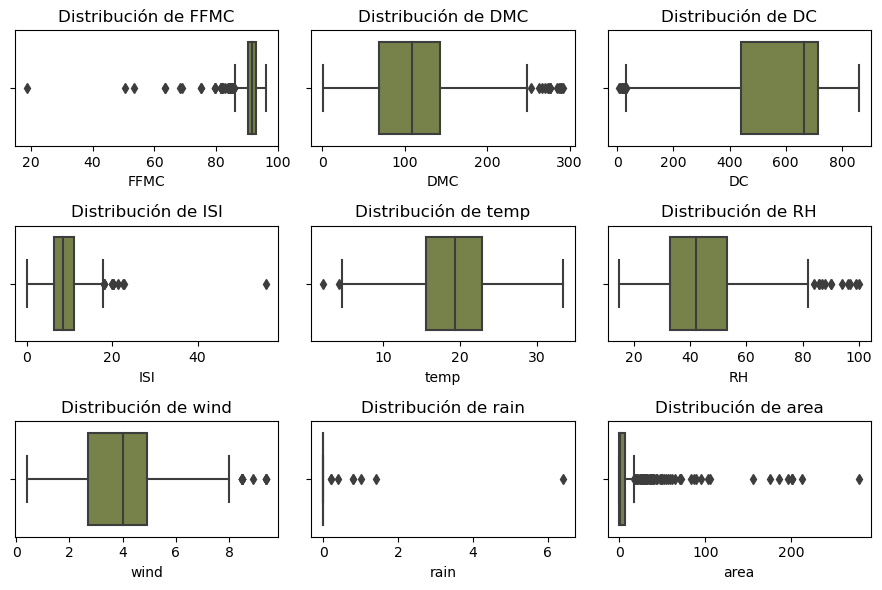

In [13]:
variables = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
generar_suplots_boxplots(variables)

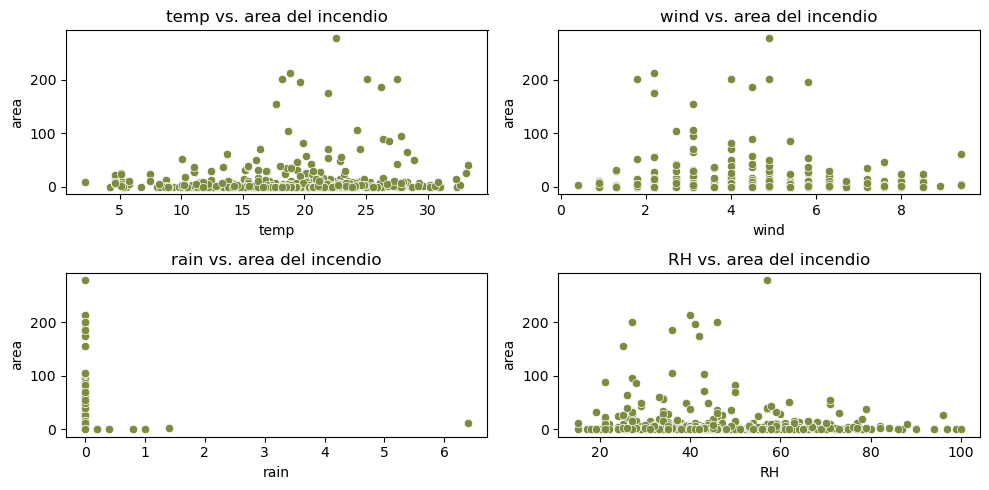

In [194]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
generar_scatter_plots('temp', 'area', ax=ax[0,0])
ax[0,0].grid(False)

generar_scatter_plots('wind', 'area', ax=ax[0,1])
ax[0,1].grid(False)

generar_scatter_plots('rain', 'area', ax=ax[1,0])
ax[1,0].grid(False)

generar_scatter_plots('RH', 'area', ax=ax[1,1])
ax[1,1].grid(False)
plt.tight_layout()
plt.show()

* No se observa una relación entre la temperatura y el área del incendio.
* Podría haber un leve indicio de relación directa, pero es muy débil

* Se esperaría haber obtenido una relación más directa y fuerte entre la velocidad del viento y el área del incendio, debido a que este es un factor muy importante en la expansión de las llamas.

* Cuando hay presencia de lluvia, el área del incendio prácticamente es cero o muy baja.

* A mayor humedad relativa en el ambiente (cantidad de vapor de agua presente en el aire), las llamas tienden a expandirse en menor medida (menor área del incendio)

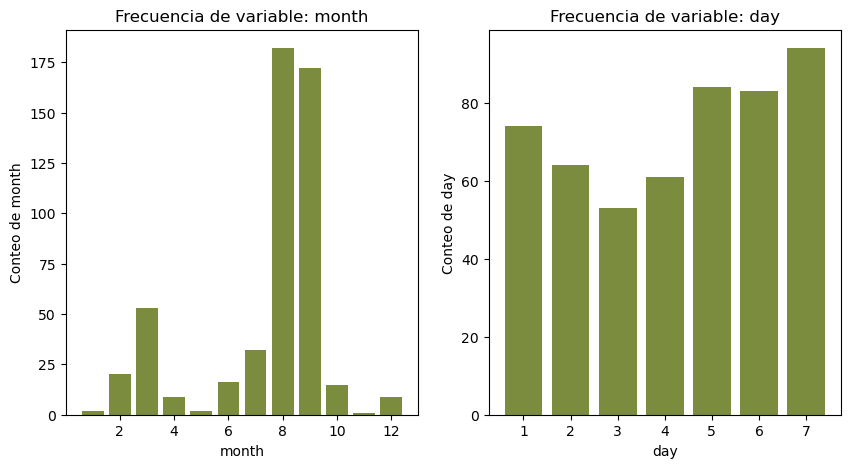

In [15]:
generar_barplot('month', 'day')

* En los meses Julio y Agosto se concentra la mayoría de registros de incendios. Y en noviembre, el mes con menor frecuencia de incendios.
* El día domingo hay mayor frecuencia de apariciones de incendios.

<Figure size 800x400 with 0 Axes>

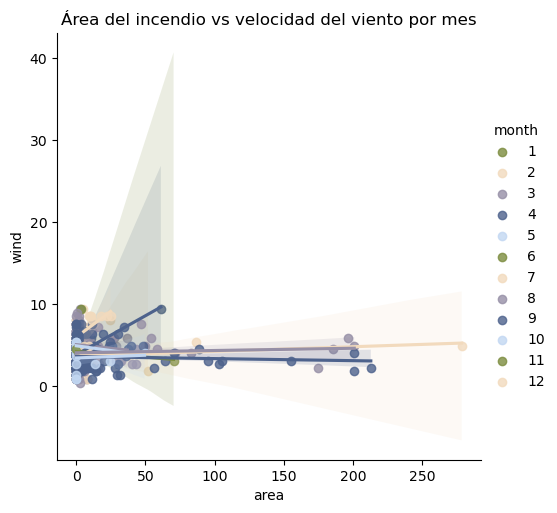

In [16]:
generar_lmplot('wind', 'area', 'month', 'Área del incendio vs velocidad del viento por mes')

* Los valores más altos en cuanto a áreas del incendio, se alcanzan en los meses donde hay más viento Agosto y Septiembre (8 y 9).

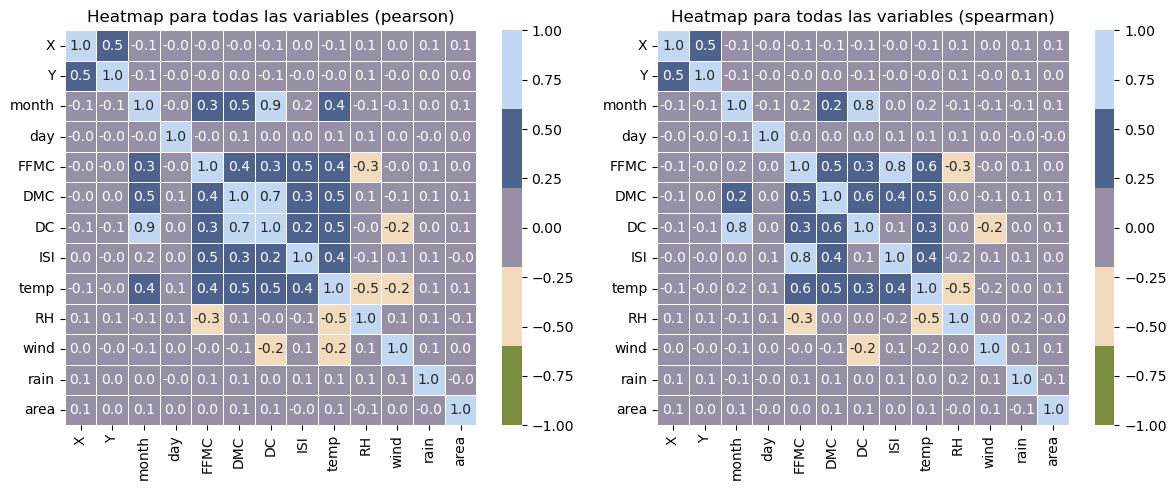

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(df, "Heatmap para todas las variables", ax=ax[0])
ax[0].grid(False)

generar_heatmap(df, "Heatmap para todas las variables", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

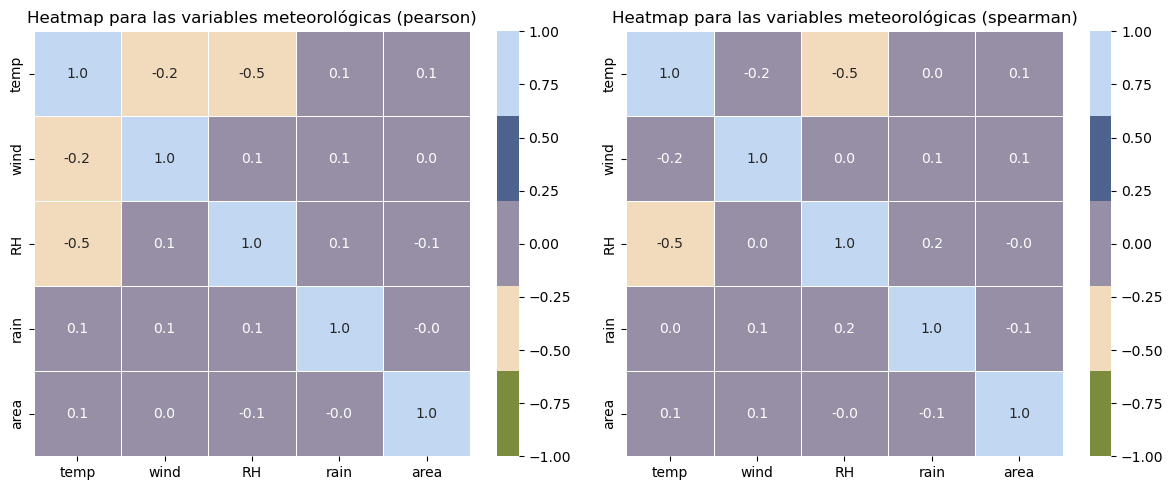

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(df[["temp", "wind","RH", "rain", "area"]], "Heatmap para las variables meteorológicas", ax=ax[0])
ax[0].grid(False)

generar_heatmap(df[["temp", "wind","RH", "rain", "area"]], "Heatmap para las variables meteorológicas", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

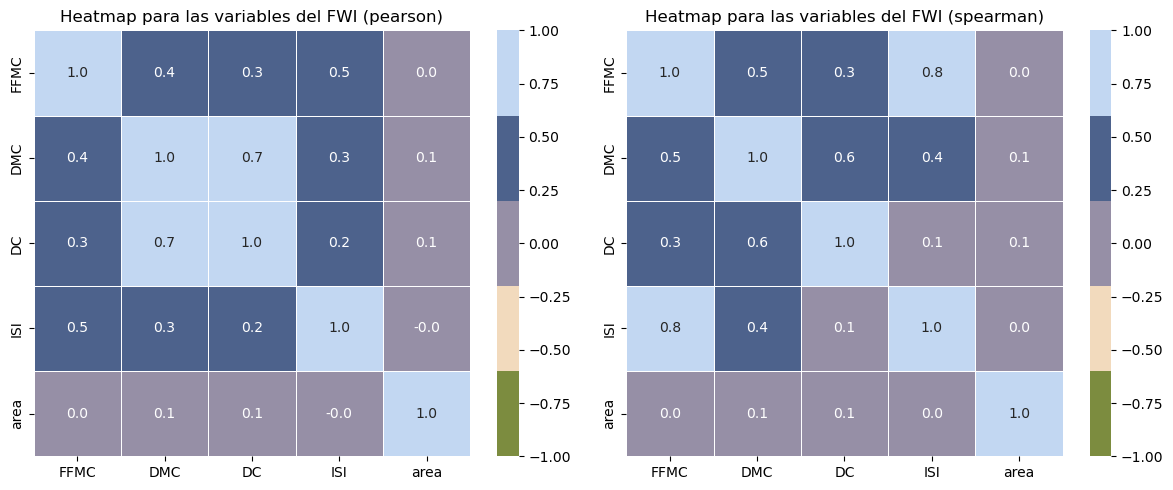

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(df[["FFMC", "DMC", "DC", "ISI","area"]], "Heatmap para las variables del FWI", ax=ax[0])
ax[0].grid(False)

generar_heatmap(df[["FFMC", "DMC", "DC", "ISI","area"]], "Heatmap para las variables del FWI", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

In [21]:
# !pip install mysql-connector-python

In [156]:
import mysql.connector

In [182]:
def ejecutar_query(query, database=None, records=None):
    import mysql.connector
    try:
        conn = mysql.connector.connect(user='root', password='1234', host='localhost', database=database)
        cursor = conn.cursor()
        print('Conexión con la BD realizada')
        
        if records is not None:
            cursor.executemany(query, records)
            conn.commit()
            print('Registros insertados')
        else:
            cursor.execute(query)
            # Para consultas, recuperar y retornar los resultados
            if query.strip().lower().startswith("select"):
                results = cursor.fetchall()
                print('Query ejecutado')
                cursor.close()
                conn.close()
                print('Cursor y conexión cerrados')
                return results  # Retorna los resultados de la consulta
        cursor.close()
        conn.close()
        print('Cursor y conexión cerrados')
    except Exception as e:
        print(f'Error durante la ejecución de la consulta: {e}')
        return None

In [158]:
crear_bd = """CREATE DATABASE forest_fires;"""

In [159]:
# Crea la base de datos
ejecutar_query(crear_bd)

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


In [160]:
crear_tabla = """
CREATE TABLE forest_fires (
    id INT AUTO_INCREMENT,
    X INT,
    Y INT,
    month VARCHAR(255),
    day VARCHAR(255),
    FFMC FLOAT,
    DMC FLOAT,
    DC FLOAT,
    ISI FLOAT,
    temp FLOAT,
    RH INT,
    wind FLOAT,
    rain FLOAT,
    area FLOAT,
    PRIMARY KEY (id)
)
"""

In [161]:
# Crea la tabla
ejecutar_query(crear_tabla, database='forest_fires')

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


In [162]:
columns = ','.join("`" + str(x).replace('/', '_') + "`" for x in df.columns.tolist())
columns

'`X`,`Y`,`month`,`day`,`FFMC`,`DMC`,`DC`,`ISI`,`temp`,`RH`,`wind`,`rain`,`area`'

In [163]:
values = ','.join(['%s' for _ in df.columns.tolist()])
values

'%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s'

In [164]:
insertar_datos  = """
INSERT INTO forest_fires (X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [165]:
records = [tuple(x) for x in df.to_numpy()]

ejecutar_query(insertar_datos, database='forest_fires', records=records)

Conexión con la BD realizada
Registros insertados
Cursor y conexión cerrados


In [183]:
query = "SELECT * FROM forest_fires.forest_fires LIMIT 5"
results = ejecutar_query(query, database='forest_fires')

if results is not None:
    for row in results:
        print(row)  

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados
(1, 7, 5, '3.0', '5.0', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0)
(2, 7, 4, '10.0', '2.0', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0)
(3, 7, 4, '10.0', '6.0', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0)
(4, 8, 6, '3.0', '5.0', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0)
(5, 8, 6, '3.0', '7.0', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0)


#### Realizar consultas SQL (CRUD) para simular la manipulación de la base de datos.

In [184]:
import random

random_records = []

for _ in range(200):
    record = {
        'X': random.randint(1, 9),
        'Y': random.randint(2, 9),
        'month': random.choice(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0','8.0', '9.0', '10.0', '11.0', '12.0']),
        'day': random.choice(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0']),
        'FFMC': random.uniform(18.7, 96.2),
        'DMC': random.uniform(1.1, 291.3),
        'DC': random.uniform(7.9, 860.6),
        'ISI': random.uniform(0.0, 56.1),
        'temp': random.uniform(2.0, 33.3),
        'RH': random.randint(15, 100),
        'wind': random.uniform(0.4, 9.4),
        'rain': random.uniform(0.0, 6.4),
        'area': random.uniform(0.0, 1250.0)
    }
    random_records.append(record)

random_records


[{'X': 4,
  'Y': 5,
  'month': '5.0',
  'day': '3.0',
  'FFMC': 69.33936851009459,
  'DMC': 41.314882446230754,
  'DC': 289.41287408915326,
  'ISI': 26.70978921226037,
  'temp': 16.058345165618917,
  'RH': 32,
  'wind': 7.916809055478554,
  'rain': 1.3128611758512314,
  'area': 813.4270895871119},
 {'X': 6,
  'Y': 7,
  'month': '6.0',
  'day': '1.0',
  'FFMC': 80.90473408780136,
  'DMC': 161.03715672692033,
  'DC': 47.06534204198419,
  'ISI': 33.756325311004474,
  'temp': 21.323874779760967,
  'RH': 72,
  'wind': 0.829254779391468,
  'rain': 2.70346024228132,
  'area': 983.4507589603272},
 {'X': 4,
  'Y': 2,
  'month': '3.0',
  'day': '3.0',
  'FFMC': 94.07795814296583,
  'DMC': 229.49724226356798,
  'DC': 527.0017338621401,
  'ISI': 49.67077807303296,
  'temp': 4.708223641129526,
  'RH': 37,
  'wind': 4.292629541521574,
  'rain': 4.059825876088901,
  'area': 781.9067062978181},
 {'X': 2,
  'Y': 9,
  'month': '6.0',
  'day': '6.0',
  'FFMC': 44.87548288020551,
  'DMC': 119.635995225607

In [185]:
insert_query = """
INSERT INTO forest_fires (X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Preparar los datos para inserción convirtiendo cada diccionario en una tupla
records_to_insert = [tuple(record.values()) for record in random_records]

ejecutar_query(insert_query, database='forest_fires', records=records_to_insert)

Conexión con la BD realizada
Registros insertados
Cursor y conexión cerrados


In [186]:
query_ = "SELECT COUNT(*) FROM  forest_fires.forest_fires"
results = ejecutar_query(query_, database='forest_fires')

if results is not None:
    for row in results:
        print(row)  

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados
(713,)


In [187]:
actualizar_registros = """
UPDATE forest_fires
SET rain = %s
WHERE area = %s
"""

values = (0.5, 0)  # actualizar 'rain' a 0.5 donde 'area' es 0

# La función espera recibir 'records' como una lista de tuplas,
# y dado que estamos actualizando un solo registro, envolveremos 'values' en una lista.
ejecutar_query(actualizar_registros, database='forest_fires', records=[values])

Conexión con la BD realizada
Registros insertados
Cursor y conexión cerrados


In [189]:
query_2 = "SELECT DISTINCT rain FROM  forest_fires.forest_fires WHERE area = 0;"
results = ejecutar_query(query_2, database='forest_fires')

if results is not None:
    for row in results:
        print(row)  

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados
(0.5,)


In [190]:
def ejecutar_query_(query, database=None):
    import mysql.connector
    try:
        conn = mysql.connector.connect(user='root', password='1234', host='localhost', database=database)
        cursor = conn.cursor()
        print('Conexión con la BD realizada')

        cursor.execute(query)
        # Para consultas, recuperar y retornar los resultados
        if query.strip().lower().startswith("select"):
            results = cursor.fetchall()
            print('Query ejecutado')
            cursor.close()
            conn.close()
            print('Cursor y conexión cerrados')
            return results  # Retorna los resultados de la consulta
        cursor.close()
        conn.close()
        print('Cursor y conexión cerrados')
    except Exception as e:
        print(f'Error durante la ejecución de la consulta: {e}')
        return None

In [191]:
query_3 = "SELECT temp, wind, rain, RH, area FROM  forest_fires.forest_fires;"
results = ejecutar_query_(query_3, database='forest_fires')

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


In [197]:
data_meteorologica = pd.DataFrame(results, columns=['temp', 'wind', 'rain', 'RH', 'area'])
data_meteorologica.head()

,temp,wind,rain,RH,area
0,8.2,6.7,0.5,51,0.0
1,18.0,0.9,0.5,33,0.0
2,14.6,1.3,0.5,33,0.0
3,8.3,4.0,0.5,97,0.0
4,11.4,1.8,0.5,99,0.0


In [201]:
cols_data_meteorologica = list(data_meteorologica.columns)
cols_data_meteorologica

['temp', 'wind', 'rain', 'RH', 'area']

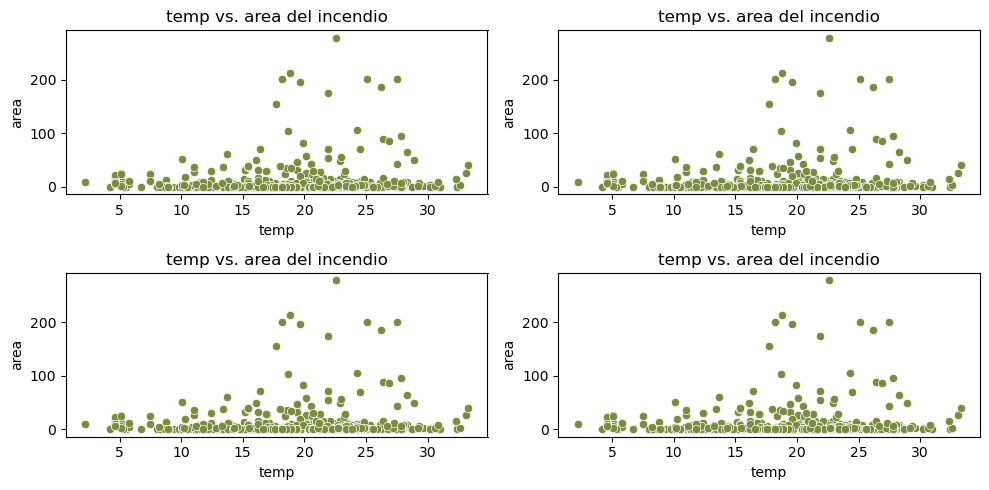

In [202]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
generar_scatter_plots(cols_data_meteorologica[0], cols_data_meteorologica[-1], data = data_meteorologica, ax=ax[0,0])
ax[0,0].grid(False)

generar_scatter_plots(cols_data_meteorologica[0], cols_data_meteorologica[-1], data = data_meteorologica, ax=ax[0,1])
ax[0,1].grid(False)

generar_scatter_plots(cols_data_meteorologica[0], cols_data_meteorologica[-1],  data = data_meteorologica, ax=ax[1,0])
ax[1,0].grid(False)

generar_scatter_plots(cols_data_meteorologica[0], cols_data_meteorologica[-1],  data = data_meteorologica, ax=ax[1,1])
ax[1,1].grid(False)
plt.tight_layout()
plt.show()

In [210]:
query_4 = "SELECT month, day FROM  forest_fires.forest_fires;"
results_ = ejecutar_query_(query_4, database='forest_fires')
results_

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


[('3.0', '5.0'),
 ('10.0', '2.0'),
 ('10.0', '6.0'),
 ('3.0', '5.0'),
 ('3.0', '7.0'),
 ('8.0', '7.0'),
 ('8.0', '1.0'),
 ('8.0', '1.0'),
 ('9.0', '2.0'),
 ('9.0', '6.0'),
 ('9.0', '6.0'),
 ('9.0', '6.0'),
 ('8.0', '5.0'),
 ('9.0', '1.0'),
 ('9.0', '3.0'),
 ('9.0', '5.0'),
 ('3.0', '6.0'),
 ('10.0', '1.0'),
 ('3.0', '3.0'),
 ('4.0', '6.0'),
 ('9.0', '2.0'),
 ('9.0', '1.0'),
 ('6.0', '7.0'),
 ('8.0', '6.0'),
 ('8.0', '6.0'),
 ('8.0', '7.0'),
 ('9.0', '5.0'),
 ('9.0', '1.0'),
 ('9.0', '6.0'),
 ('9.0', '7.0'),
 ('9.0', '5.0'),
 ('9.0', '1.0'),
 ('9.0', '5.0'),
 ('9.0', '7.0'),
 ('9.0', '1.0'),
 ('9.0', '2.0'),
 ('10.0', '2.0'),
 ('10.0', '5.0'),
 ('10.0', '6.0'),
 ('3.0', '2.0'),
 ('7.0', '2.0'),
 ('8.0', '6.0'),
 ('8.0', '2.0'),
 ('9.0', '6.0'),
 ('9.0', '3.0'),
 ('9.0', '3.0'),
 ('9.0', '1.0'),
 ('7.0', '1.0'),
 ('3.0', '1.0'),
 ('3.0', '1.0'),
 ('9.0', '4.0'),
 ('8.0', '7.0'),
 ('8.0', '3.0'),
 ('8.0', '4.0'),
 ('9.0', '4.0'),
 ('9.0', '2.0'),
 ('10.0', '7.0'),
 ('2.0', '1.0'),
 ('2.0'

In [205]:
data_dias_meses = pd.DataFrame(results_, columns=['month', 'day'])
data_dias_meses.head()

,month,day
0,3.0,5.0
1,10.0,2.0
2,10.0,6.0
3,3.0,5.0
4,3.0,7.0


In [206]:
cols_data_dias_meses = list(data_dias_meses.columns)
cols_data_dias_meses

['month', 'day']

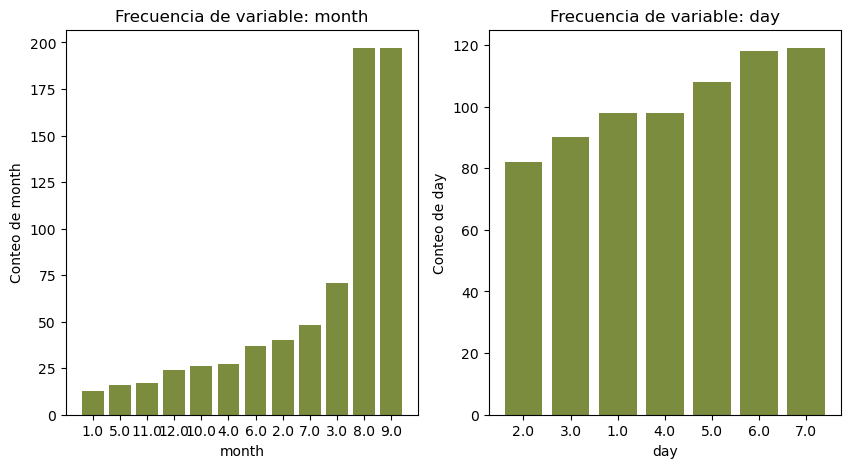

In [207]:
generar_barplot(cols_data_dias_meses[0], cols_data_dias_meses[1], data=data_dias_meses)

In [211]:
query_5 = "SELECT wind, month, area FROM  forest_fires.forest_fires;"
results_1 = ejecutar_query_(query_5, database='forest_fires')
results_1

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


[(6.7, '3.0', 0.0),
 (0.9, '10.0', 0.0),
 (1.3, '10.0', 0.0),
 (4.0, '3.0', 0.0),
 (1.8, '3.0', 0.0),
 (5.4, '8.0', 0.0),
 (3.1, '8.0', 0.0),
 (2.2, '8.0', 0.0),
 (5.4, '9.0', 0.0),
 (4.0, '9.0', 0.0),
 (7.2, '9.0', 0.0),
 (4.0, '9.0', 0.0),
 (6.7, '8.0', 0.0),
 (2.2, '9.0', 0.0),
 (4.5, '9.0', 0.0),
 (5.4, '9.0', 0.0),
 (5.4, '3.0', 0.0),
 (4.9, '10.0', 0.0),
 (4.0, '3.0', 0.0),
 (4.5, '4.0', 0.0),
 (2.7, '9.0', 0.0),
 (2.7, '9.0', 0.0),
 (4.5, '6.0', 0.0),
 (5.8, '8.0', 0.0),
 (5.8, '8.0', 0.0),
 (5.4, '8.0', 0.0),
 (5.8, '9.0', 0.0),
 (1.3, '9.0', 0.0),
 (2.7, '9.0', 0.0),
 (3.6, '9.0', 0.0),
 (3.6, '9.0', 0.0),
 (7.6, '9.0', 0.0),
 (1.8, '9.0', 0.0),
 (3.6, '9.0', 0.0),
 (2.7, '9.0', 0.0),
 (4.5, '9.0', 0.0),
 (4.5, '10.0', 0.0),
 (5.4, '10.0', 0.0),
 (4.0, '10.0', 0.0),
 (2.7, '3.0', 0.0),
 (3.1, '7.0', 0.0),
 (6.7, '8.0', 0.0),
 (5.4, '8.0', 0.0),
 (2.7, '9.0', 0.0),
 (4.9, '9.0', 0.0),
 (4.0, '9.0', 0.0),
 (3.6, '9.0', 0.0),
 (3.1, '7.0', 0.0),
 (1.8, '3.0', 0.0),
 (5.8, '3.0', 

In [213]:
data_lmplot = pd.DataFrame(results_1, columns=['wind', 'month', 'area'])
cols_data_lmplot = list(data_lmplot.columns)
data_lmplot.head()

,wind,month,area
0,6.7,3.0,0.0
1,0.9,10.0,0.0
2,1.3,10.0,0.0
3,4.0,3.0,0.0
4,1.8,3.0,0.0


<Figure size 800x400 with 0 Axes>

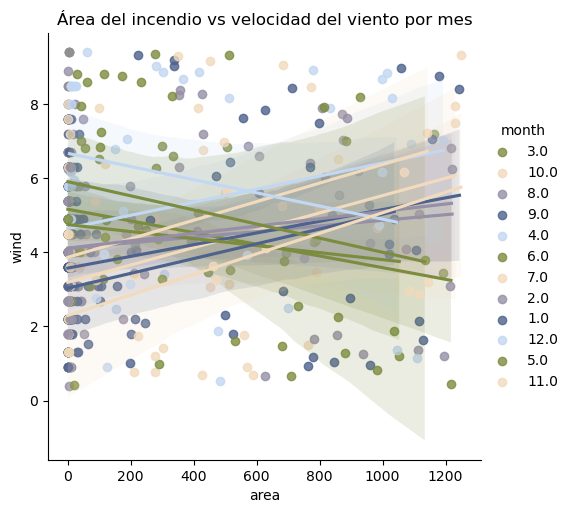

In [214]:
generar_lmplot(cols_data_lmplot[0], cols_data_lmplot[2], cols_data_lmplot[1], 'Área del incendio vs velocidad del viento por mes', df=data_lmplot)

In [220]:
query_6 = "SELECT X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area FROM forest_fires.forest_fires;"
results_2 = ejecutar_query_(query_6, database='forest_fires')
results_2

Conexión con la BD realizada
Query ejecutado
Cursor y conexión cerrados


[(7, 5, '3.0', '5.0', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.5, 0.0),
 (7, 4, '10.0', '2.0', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.5, 0.0),
 (7, 4, '10.0', '6.0', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.5, 0.0),
 (8, 6, '3.0', '5.0', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.5, 0.0),
 (8, 6, '3.0', '7.0', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.5, 0.0),
 (8, 6, '8.0', '7.0', 92.3, 85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.5, 0.0),
 (8, 6, '8.0', '1.0', 92.3, 88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.5, 0.0),
 (8, 6, '8.0', '1.0', 91.5, 145.4, 608.2, 10.7, 8.0, 86, 2.2, 0.5, 0.0),
 (8, 6, '9.0', '2.0', 91.0, 129.5, 692.6, 7.0, 13.1, 63, 5.4, 0.5, 0.0),
 (7, 5, '9.0', '6.0', 92.5, 88.0, 698.6, 7.1, 22.8, 40, 4.0, 0.5, 0.0),
 (7, 5, '9.0', '6.0', 92.5, 88.0, 698.6, 7.1, 17.8, 51, 7.2, 0.5, 0.0),
 (7, 5, '9.0', '6.0', 92.8, 73.2, 713.0, 22.6, 19.3, 38, 4.0, 0.5, 0.0),
 (6, 5, '8.0', '5.0', 63.5, 70.8, 665.3, 0.8, 17.0, 72, 6.7, 0.5, 0.0),
 (6, 5, '9.0', '1.0', 90.9, 126.5, 686.5, 7.0, 21.3, 42, 2.2, 

In [222]:
data_mod = pd.DataFrame(results_2, columns=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
cols_data_mod = list(data_mod.columns)
data_mod.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3.0,5.0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.5,0.0
1,7,4,10.0,2.0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.5,0.0
2,7,4,10.0,6.0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.5,0.0
3,8,6,3.0,5.0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.5,0.0
4,8,6,3.0,7.0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.5,0.0


C:\Users\MichaelPage\AppData\Local\Temp\ipykernel_15896\2344242597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method=metodo), annot=True, ax=ax, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1,  cmap=cmap)


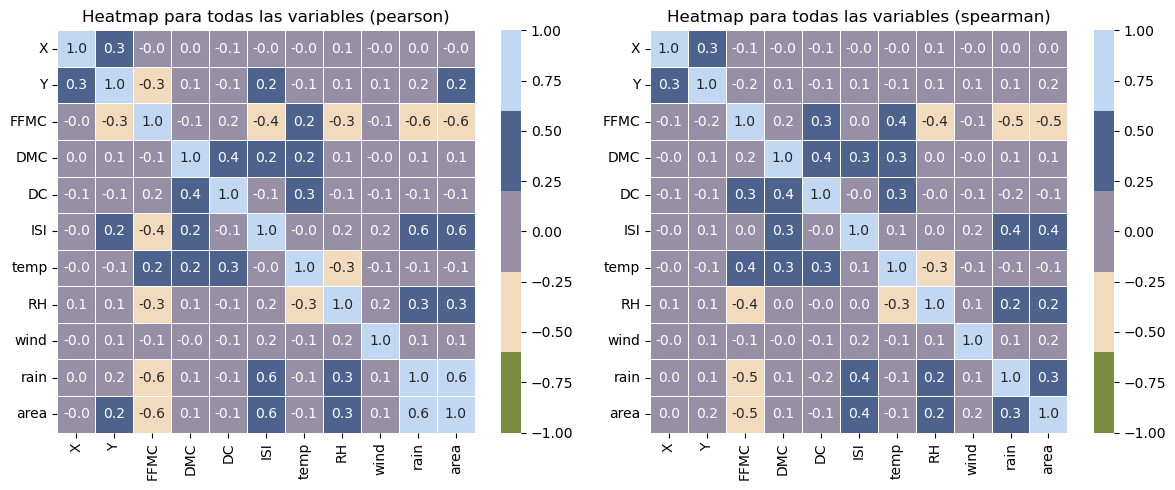

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(data_mod, "Heatmap para todas las variables", ax=ax[0])
ax[0].grid(False)

generar_heatmap(data_mod, "Heatmap para todas las variables", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

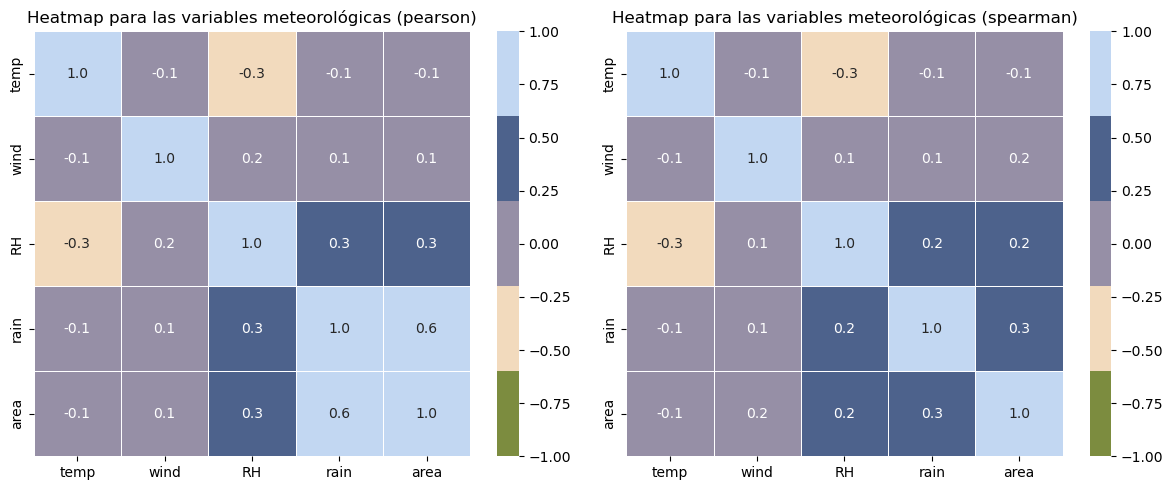

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(data_mod[["temp", "wind","RH", "rain", "area"]], "Heatmap para las variables meteorológicas", ax=ax[0])
ax[0].grid(False)

generar_heatmap(data_mod[["temp", "wind","RH", "rain", "area"]], "Heatmap para las variables meteorológicas", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

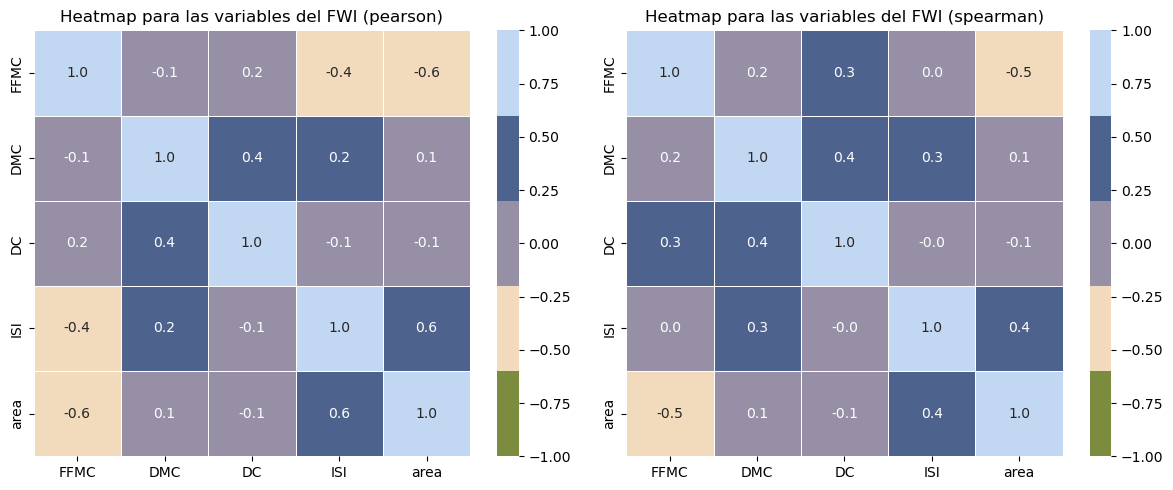

In [225]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
generar_heatmap(data_mod[["FFMC", "DMC", "DC", "ISI","area"]], "Heatmap para las variables del FWI", ax=ax[0])
ax[0].grid(False)

generar_heatmap(data_mod[["FFMC", "DMC", "DC", "ISI","area"]], "Heatmap para las variables del FWI", 'spearman', ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show()

In [227]:
!pip install -q sqlalchemy

In [230]:
from sqlalchemy import create_engine

nombre_archivo_db = 'forest_fires.db'

# Crea el motor de SQLAlchemy para SQLite
engine = create_engine(f'sqlite:///{nombre_archivo_db}')

# Guarda el DataFrame de la consulta como .db
data_mod.to_sql('forest_fires', con=engine, if_exists='replace', index=False)

713